<a href="https://colab.research.google.com/github/juancuevas-ops/analisis-molecular-covid19/blob/main/Hongo_negro_investigacion_juan_cuevasv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Bio

     |████████████████████████████████| 102kB 4.4MB/s 
     |████████████████████████████████| 2.3MB 8.4MB/s 


In [6]:
from Bio import SeqIO
hongo_negro = SeqIO.read("/content/mucor_circinelloides.fasta","fasta")

In [40]:
from Bio import SeqIO
covid = SeqIO.read("/content/sequencewa.fasta","fasta")
covid

SeqRecord(seq=Seq('AACCTTTAAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAAT...AAA'), id='MT293201.1', name='MT293201.1', description='MT293201.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/WA-UW-1611/2020, complete genome', dbxrefs=[])

In [91]:
hongo_adn = hongo_negro.seq
print( hongo_adn[:21])


GGCGATATTGAGCTTATGGTT


In [7]:
hongo_negro

SeqRecord(seq=Seq('GGCGATATTGAGCTTATGGTTGTGCATAAAAGATTGAGGATTAGTATCATAAAT...AGT'), id='KE123896.1', name='KE123896.1', description='KE123896.1 Mucor circinelloides f. circinelloides 1006PhL unplaced genomic scaffold supercont1.1, whole genome shotgun sequence', dbxrefs=[])

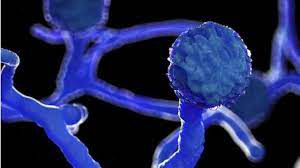

In [8]:
from PIL import Image
img=Image.open("/content/imagen_hongo.jpg")
img


In [92]:
hongo_adn = hongo_negro.seq
print( hongo_adn[:21])


GGCGATATTGAGCTTATGGTT


temperatura de hibridación con el ADN molde del 37%

In [93]:
from Bio.SeqUtils import GC
GC(hongo_adn)

37.053100315985496

In [79]:
hongo_trancripcion = hongo_adn.transcibe()
hongo_trancripcion

Seq('GGCGAUAUUGAGCUUAUGGUUGUGCAUAAAAGAUUGAGGAUUAGUAUCAUAAAU...AGU')

In [22]:
from Bio import Seq
hongo_traduccion = hongo_trancripcion.translate()
hongo_traduccion

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('GDIELMVVHKRLRISIINWHIIGIGGLCNGRNTH*TKGAETPSAGLVEFKEAAG...IKI')

In [29]:
hongo_analysed = ProteinAnalysis(str(hongo_traduccion))
hongo_analysed.count_amino_acids()

{'A': 9509,
 'C': 7627,
 'D': 6217,
 'E': 6851,
 'F': 10736,
 'G': 7419,
 'H': 6908,
 'I': 13944,
 'K': 11396,
 'L': 21311,
 'M': 4415,
 'N': 8825,
 'P': 7419,
 'Q': 8530,
 'R': 12028,
 'S': 19093,
 'T': 11288,
 'V': 11057,
 'W': 3062,
 'Y': 7580}

La enolasa tiene un peso molecular de 82.000 hasta 100.000 Daltons aproximadamente, dependiendo de la isoforma de la enzima. Está formada por dos subunidades orientadas de forma anti paralela, de manera que el aminoácido Glu20  representado en la lista con una letra "Q" de una subunidad forma un enlace iónico con Arg414 REPRESENTADO CON LA LETRA "R" de la otra subunidad.EN LA LISTA DE AMINOACIDOS MOSTRADA ARRIBA.

In [107]:
proteinas = hongo_traduccion.split("*")
proteinas[:4]

[Seq('GDIELMVVHKRLRISIINWHIIGIGGLCNGRNTH'),
 Seq('TKGAETPSAGLVEFKEAAGGIVGFWESVSSILTSSLAKGGSDL'),
 Seq('AFSG'),
 Seq('TH')]

La tirosina hidroxilasa o tirosina 3-monooxigenasa (EC 1.14.16.2) es la enzima responsable de catalizar la conversión del aminoácido L-tirosina a dihidroxifenilalanina (DOPA). La DOPA es el precursor de la dopamina, que a su vez es también el precursor de la noradrenalina y la adrenalina. En humanos, la tirosina hidroxilasa es codificada por el gen TH.1​

dopamina
Cómo se pronuncia
nombre femenino
BIOLOGÍA
Neurotransmisor que está presente en diversas áreas del cerebro y que es especialmente importante para la función motora del organismo.

In [32]:

from collections import Counter
Counter(hongo_traduccion).most_common(10)

[('L', 21311),
 ('S', 19093),
 ('X', 15607),
 ('I', 13944),
 ('R', 12028),
 ('K', 11396),
 ('T', 11288),
 ('V', 11057),
 ('F', 10736),
 ('*', 10601)]

In [27]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
print("cantidad_proteinas_hongo ::",len(hongo_traduccion))

cantidad_proteinas_hongo :: 221423


In [80]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [94]:
covid_adn = covid.seq
print( covid_adn[:21])

AACCTTTAAACTTTCGATCTC


In [95]:
from Bio.SeqUtils import GC
GC(covid_adn)

37.99169067881793

EXISTE UNA SIMILITUD MUY ESTRECHA ENTRE EL HONGO NEGRO Y EL ADN DEL SARSCORV2 temperatura de hibridación con el ADN molde del 37%. AMBOS SON DE UN 37 %

In [96]:
from Bio.SeqUtils import GC
GC(hongo_adn)

37.053100315985496

In [97]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

In [99]:
seq1 = ("GGCGATATTGAGCTTATGGTT")
seq2 = ("AACCTTTAAACTTTCGATCTC")

In [100]:
alignments2 = pairwise2.align.globalxx(seq1,seq2,one_alignment_only=True,score_only=True)

In [101]:
alignments2

12.0

In [102]:
alignments2/len(seq1)*100

57.14285714285714

# EL RESULTADO DEL ANALISIS ARROJA UN 57.14% DE SIMILITUD ENTRE MUCOR_CIRCINELOIDES Y SARSCORV2.EN TERMINOS GENETICOS.


In [103]:
def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x != y])

# Distancia de Hamming: muestra en cuántos lugares difieren 2 cuerdas La distancia de Hamming entre dos cadenas de igual longitud es el número de posiciones en las que los símbolos correspondientes son diferentes. En otras palabras, mide el número mínimo de sustituciones necesarias para cambiar una cadena por otra, o la cantidad mínima de errores que podrían haber transformado una cadena en otra. Se utiliza para la detección o corrección de errores. Se utiliza para cuantificar la similitud de secuencias de ADN, Para comprobar la distancia de edición La distancia de edición es una forma de cuantificar qué tan diferentes son dos cadenas (por ejemplo, palabras) entre sí contando el número mínimo de operaciones necesarias para transformar una cadena en la otra. por ejemplo, distancia de Levenshtein

In [104]:
def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2)

# EN LA SIMILITUD DEL GRAFICO,MUESTRA QUE LOS PUNTOS MAS CERCANOS ES DECIR JUNTOS REPRESENTAN LOS COMPONENTES DE MAYOR SIMILITUD.

In [105]:
dotplot(seq1,seq2)

 |AACCTTTAAACTTTCGATCTC
-----------------------
G|               ■     
G|               ■     
C|  ■■      ■   ■   ■ ■
G|               ■     
A|■■     ■■■      ■    
T|    ■■■    ■■■   ■ ■ 
A|■■     ■■■      ■    
T|    ■■■    ■■■   ■ ■ 
T|    ■■■    ■■■   ■ ■ 
G|               ■     
A|■■     ■■■      ■    
G|               ■     
C|  ■■      ■   ■   ■ ■
T|    ■■■    ■■■   ■ ■ 
T|    ■■■    ■■■   ■ ■ 
A|■■     ■■■      ■    
T|    ■■■    ■■■   ■ ■ 
G|               ■     
G|               ■     
T|    ■■■    ■■■   ■ ■ 
T|    ■■■    ■■■   ■ ■ 


# Este hongo tiene una alta incidencia entre pacientes enfermos y recuperados de covid-19. Al menos 19 regiones de la India ya han elevado en los últimos dos meses a categoría de epidemia el avance de esta enfermedad, que cuenta con más de 14.000 diagnósticos en ese país, y zonas del mundo como América ya reportan, aunque limitados, varios casos de infecciones

La enolasa tiene un peso molecular de 82.000 hasta 100.000 Daltons aproximadamente, dependiendo de la isoforma de la enzima. Está formada por dos subunidades orientadas de forma anti paralela, de manera que el aminoácido Glu20 de una subunidad forma un enlace iónico con Arg414 de la otra subunidad.

TRABAJO CREADO POR EL CIENTIFICO DE DATOS JUAN CUEVAS VASQUEZ.ANALISIS DE BACTERIA MUCOR CIRCINELOIDES "HONGO NEGRO" EL CUAL ESTA AFECTANDO A MUCHAS PAISES Y YA ESTA EN LAINOAMERICA AFECTANDO AL PAIS DE URUGUAY.
ADEMAS SE HA HECHO UN ANALISIS COMPARATIVO EN SUS BASES NITROGENADAS DE "CGTA" CON EL VIRUS SARSCORV2 ENCONTARNDO SIMILITUD DE UN 57%.